- Importing required modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

- Information about the dataset

In [2]:
df1 = pd.read_csv("Bank_Account_or_Service_Complaints.csv")
df1.head(3)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
1,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
2,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84811 entries, 0 to 84810
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 84811 non-null  object 
 1   Product                       84811 non-null  object 
 2   Sub-product                   84811 non-null  object 
 3   Issue                         84811 non-null  object 
 4   Sub-issue                     0 non-null      float64
 5   Consumer complaint narrative  13860 non-null  object 
 6   Company public response       22991 non-null  object 
 7   Company                       84811 non-null  object 
 8   State                         83262 non-null  object 
 9   ZIP code                      83261 non-null  object 
 10  Tags                          11632 non-null  object 
 11  Consumer consent provided?    22372 non-null  object 
 12  Submitted via                 84811 non-null  object 
 13  D

**Data Pre-processing**

- Checking for duplicate records

In [4]:
df1.duplicated().value_counts()

False    84811
dtype: int64

No duplicate records

- Dropping redundant columns

In [5]:
df1.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [6]:
df1.drop(["Sub-issue","ZIP code","Consumer complaint narrative","Complaint ID"],axis=1,inplace=True)

In [7]:
df1.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue',
       'Company public response', 'Company', 'State', 'Tags',
       'Consumer consent provided?', 'Submitted via', 'Date sent to company',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?'],
      dtype='object')

- Null Value processing 
columns containing null values are : Company public response, State, Tags, Consumer consent provided?, Consumer disputed?

*Company public response column*

In [8]:
df1["Company public response"].isnull().value_counts()

True     61820
False    22991
Name: Company public response, dtype: int64

"Company public response" consists of 61820 null values 

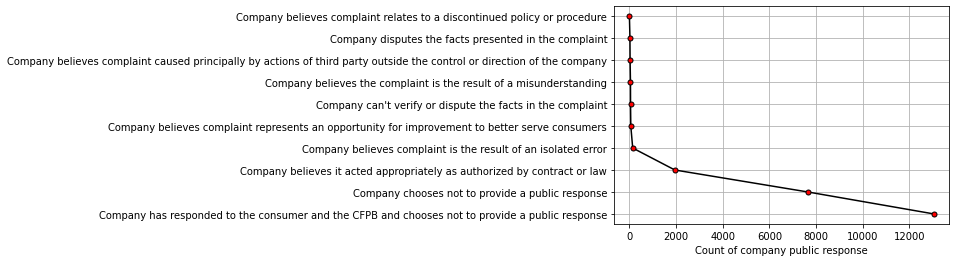

In [9]:
data=pd.DataFrame(df1["Company public response"].value_counts()).reset_index()
plt.plot(data["Company public response"],data["index"],marker="o",markersize=5,markerfacecolor="r",color="k")
plt.xlabel("Count of company public response")
plt.grid()

Inferences;
- The major responses given by comapanies to customer are as follows;

1.Company has responded to the consumer and the CFPB and chooses not to provide a public response (R1)

2.Company chooses not to provide a public response (R2)

3.Company believes it acted appropriately as authorized by contract or law (R2)

So if I'll be assigning these three responses to null values in the column "Company public response", but to make it more precise I'll look for some more criteria

In [10]:
Total_null_values = df1["Company public response"].isnull().value_counts().loc[True]
Total_not_null_values = df1["Company public response"].notnull().value_counts().loc[True]
R1 = df1["Company public response"].value_counts()["Company has responded to the consumer and the CFPB and chooses not to provide a public response"]
R2 = df1["Company public response"].value_counts()["Company chooses not to provide a public response"]
R3 = df1["Company public response"].value_counts()["Company believes it acted appropriately as authorized by contract or law"]
print("Percentage of response R1 in all responses : ",round((R1/Total_not_null_values)*100,2),"%")
print("Percentage of response R2 in all responses : ",round((R2/Total_not_null_values)*100,2),"%")
print("Percentage of response R3 in all responses : ",round((R3/Total_not_null_values)*100,2),"%")

Percentage of response R1 in all responses :  56.73 %
Percentage of response R2 in all responses :  33.23 %
Percentage of response R3 in all responses :  8.48 %


So as per the above percentages of responses R1,R2 and R3 ,I'll be assigning the respective responses to null values in similar fashion

In [11]:
print(round(Total_null_values*0.57)," null values will be filled with response R1")
print(round(Total_null_values*0.33)," null values will be filled with response R2")
print(round(Total_null_values-(Total_null_values*0.57+Total_null_values*0.33))," null values will be filled with response R3")

35237  null values will be filled with response R1
20401  null values will be filled with response R2
6182  null values will be filled with response R3


In [12]:
x = df1.loc[df1["Company public response"].isnull(),"Company public response"]
x.iloc[:round(Total_null_values*0.57)]="Company has responded to the consumer and the CFPB and chooses not to provide a public response"
x.iloc[round(Total_null_values*0.57):(round(Total_null_values*0.57)+round(Total_null_values*0.33))]="Company chooses not to provide a public response"
x.fillna("Company believes it acted appropriately as authorized by contract or law",inplace=True)
df1.loc[df1["Company public response"].isnull(),"Company public response"]=x
df1["Company public response"].isnull().value_counts()

False    84811
Name: Company public response, dtype: int64

Thus we have successfully filled the null values of column "Company public response"

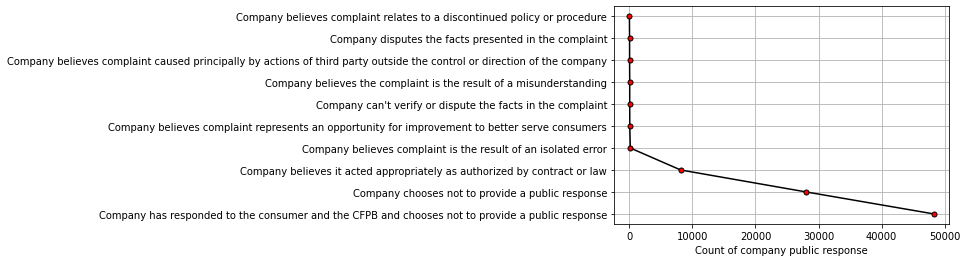

In [13]:
data=pd.DataFrame(df1["Company public response"].value_counts()).reset_index()
plt.plot(data["Company public response"],data["index"],marker="o",markersize=5,markerfacecolor="r",color="k")
plt.xlabel("Count of company public response")
plt.grid()

As we can see that the graph after null value assignmemt is similar to the graph before null value assignmet, thus we have maintained the integrity

*State column*

In [14]:
print(round((df1.State.isnull().value_counts()[True]/len(df1.State))*100,2),"%",end="")
print(" of values are null in the column State, so I will simply fill them with 'No data'")

1.83 % of values are null in the column State, so I will simply fill them with 'No data'


In [15]:
df1.loc[df1.State.isnull(),"State"]="No data"
df1.State.isnull().value_counts()

False    84811
Name: State, dtype: int64

Thus we have successfully filled the null values of column "State"

*Tags column*

In [16]:
df1.Tags.isnull().value_counts()

True     73179
False    11632
Name: Tags, dtype: int64

State column consists of 73179 null values

In [17]:
df1.Tags.value_counts()

Older American                   7763
Servicemember                    2864
Older American, Servicemember    1005
Name: Tags, dtype: int64

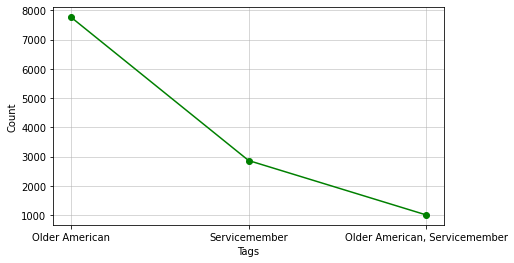

In [18]:
data = pd.DataFrame(df1.Tags.value_counts()).reset_index()
plt.figure(figsize=(7,4))
plt.plot(data["index"],data.Tags,marker="o",color="green")
plt.ylabel("Count")
plt.xlabel("Tags")
plt.grid(linewidth=0.5)

Inferences;

In [19]:
Total_null_values = df1["Tags"].isnull().value_counts().loc[True]
Total_not_null_values = df1["Tags"].notnull().value_counts().loc[True]
T1 = df1["Tags"].value_counts()["Older American"]
T2 = df1["Tags"].value_counts()["Servicemember"]
T3 = df1["Tags"].value_counts()["Older American, Servicemember"]
print("Percentage of response T1 in all tags : ",round((T1/Total_not_null_values)*100,2),"%")
print("Percentage of response T2 in all tags : ",round((T2/Total_not_null_values)*100,2),"%")
print("Percentage of response T3 in all tags : ",round((T3/Total_not_null_values)*100,2),"%")

Percentage of response T1 in all tags :  66.74 %
Percentage of response T2 in all tags :  24.62 %
Percentage of response T3 in all tags :  8.64 %


In [20]:
print(round(Total_null_values*0.67)," null values will be filled with tags T1")
print(round(Total_null_values*0.25)," null values will be filled with tags T2")
print(round(Total_null_values-(Total_null_values*0.67+Total_null_values*0.25))," null values will be filled with tags T3")

49030  null values will be filled with tags T1
18295  null values will be filled with tags T2
5854  null values will be filled with tags T3


In [21]:
x = df1.loc[df1["Tags"].isnull(),"Tags"]
x.iloc[:round(Total_null_values*0.67)]="Older American"
x.iloc[round(Total_null_values*0.67):(round(Total_null_values*0.67)+round(Total_null_values*0.25))]="Servicemember"
x.fillna("Older American, Servicemember",inplace=True)
df1.loc[df1["Tags"].isnull(),"Tags"]=x
df1["Tags"].isnull().value_counts()

False    84811
Name: Tags, dtype: int64

Thus we have successfully filled the null values of column "Tags"

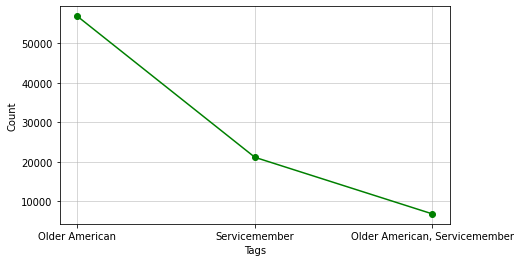

In [22]:
data = pd.DataFrame(df1.Tags.value_counts()).reset_index()
plt.figure(figsize=(7,4))
plt.plot(data["index"],data.Tags,marker="o",color="green")
plt.ylabel("Count")
plt.xlabel("Tags")
plt.grid(linewidth=0.5)

As we can see that the graph after null value assignmemt is similar to the graph before null value assignmet, thus we have maintained the integrity

*Consumer consent provided? column*

In [23]:
df1["Consumer consent provided?"].isnull().value_counts()

True     62439
False    22372
Name: Consumer consent provided?, dtype: int64

"Consumer consent provided?" consists of 62439 null values

<AxesSubplot:xlabel='Consumer consent provided?', ylabel='count'>

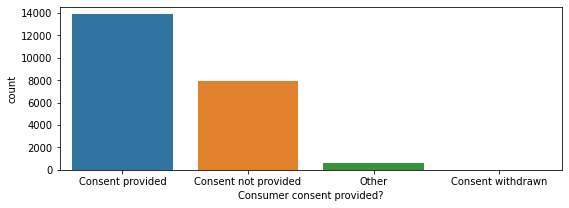

In [24]:
plt.figure(figsize=(9,3))
sns.countplot(x="Consumer consent provided?",data=df1)

Inferences;
- Maximum number of consents are provided  to consumers
- There might have been very less reasons where the consents have been withdrawn 

In [25]:
Total_null_values = df1["Consumer consent provided?"].isnull().value_counts()[True]
Total_not_null_values = df1["Consumer consent provided?"].isnull().value_counts()[False]
C1 = df1.loc[df1["Consumer consent provided?"]=='Consent provided',"Consumer consent provided?"].count()
C2 = df1.loc[df1["Consumer consent provided?"]=='Consent not provided',"Consumer consent provided?"].count()
print("Percentage of Consent provided",round((C1/Total_not_null_values)*100,2),"%")
print("Percentage of Consent not provided",round((C2/Total_not_null_values)*100,2),"%")

Percentage of Consent provided 61.95 %
Percentage of Consent not provided 35.51 %


In [26]:
print(round(Total_null_values*0.62)," null values will be filled with Consent provided")
print(round(Total_null_values*0.35)," null values will be filled with Consent not provided")

38712  null values will be filled with Consent provided
21854  null values will be filled with Consent not provided


In [27]:
x = df1.loc[df1["Consumer consent provided?"].isnull(),"Consumer consent provided?"]
x.iloc[:round(Total_null_values*0.62)]="Consent provided"
x.iloc[round(Total_null_values*0.62):(round(Total_null_values*0.62)+round(Total_null_values*0.35))]="Consent not provided"
x.fillna("Other",inplace=True)
df1.loc[df1["Consumer consent provided?"].isnull(),"Consumer consent provided?"]=x
df1["Consumer consent provided?"].isnull().value_counts()

False    84811
Name: Consumer consent provided?, dtype: int64

<AxesSubplot:xlabel='Consumer consent provided?', ylabel='count'>

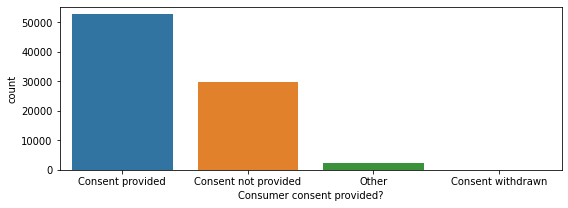

In [28]:
plt.figure(figsize=(9,3))
sns.countplot(x="Consumer consent provided?",data=df1)

As we can see that the graph after null value assignmemt is similar to the graph before null value assignmet, thus we have maintained the integrity

*'Consumer disputed?'column*

In [29]:
df1["Consumer disputed?"].isnull().value_counts()

False    80780
True      4031
Name: Consumer disputed?, dtype: int64

In [30]:
c = round((df1["Consumer disputed?"].isnull().value_counts()[True]/len(df1["Consumer disputed?"]))*100,2)
print('Columns "Consumer disputed?" consists of ',c,"% of null values")

Columns "Consumer disputed?" consists of  4.75 % of null values


In [31]:
df1.loc[df1["Consumer disputed?"].isnull(),"Consumer disputed?"]="No data"

In [32]:
df1["Consumer disputed?"].isnull().value_counts()

False    84811
Name: Consumer disputed?, dtype: int64

Thus we have successfully filled the null values

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84811 entries, 0 to 84810
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 84811 non-null  object
 1   Product                       84811 non-null  object
 2   Sub-product                   84811 non-null  object
 3   Issue                         84811 non-null  object
 4   Company public response       84811 non-null  object
 5   Company                       84811 non-null  object
 6   State                         84811 non-null  object
 7   Tags                          84811 non-null  object
 8   Consumer consent provided?    84811 non-null  object
 9   Submitted via                 84811 non-null  object
 10  Date sent to company          84811 non-null  object
 11  Company response to consumer  84811 non-null  object
 12  Timely response?              84811 non-null  object
 13  Consumer dispute

Thus we have successfully processed all the null values from the dataframe 

**Data Visualisation**

In [34]:
df1.head(3)

,Date received,Product,Sub-product,Issue,Company public response,Company,State,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,Company has responded to the consumer and the ...,Wells Fargo & Company,CA,Older American,Consent provided,Web,07/31/2013,Closed with explanation,Yes,No
1,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",Company has responded to the consumer and the ...,Santander Bank US,NY,Older American,Consent provided,Fax,07/31/2013,Closed,Yes,No
2,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,Company has responded to the consumer and the ...,Wells Fargo & Company,GA,Older American,Consent provided,Web,07/30/2013,Closed with explanation,Yes,No


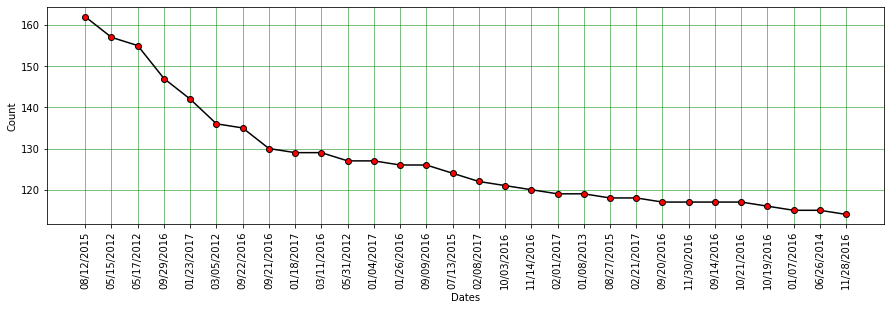

In [81]:
data = df1["Date received"].value_counts().reset_index().nlargest(30,"Date received")
plt.figure(figsize=(15,4))
plt.plot(data["index"],data["Date received"],marker="o",linestyle="-",markerfacecolor="r",color="k")
plt.xlabel("Dates")
plt.ylabel("Count")
plt.grid(linewidth=0.5,color="green")
plt.xticks(rotation=90);

Inferences;
- Maximum number of complains were recieved on 12th August 2015 followed by 15th May 2012 and 17th May 2012 repectively
- Means more than 300 complains were recieved within a span of two days in the month of May in year 2012

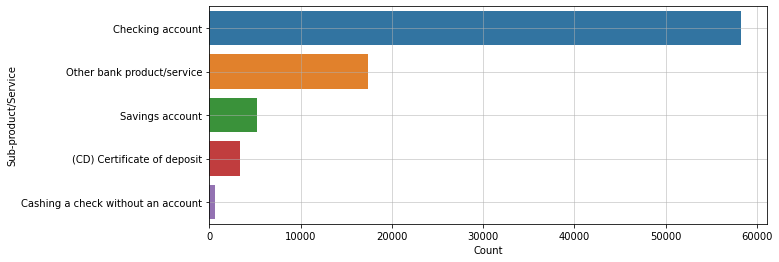

In [36]:
d = df1['Sub-product'].value_counts().reset_index()
plt.figure(figsize=(10,4))
sns.barplot(y="index",x="Sub-product",data=d)
plt.ylabel("Sub-product/Service")
plt.xlabel("Count")
plt.grid(linewidth=0.5)

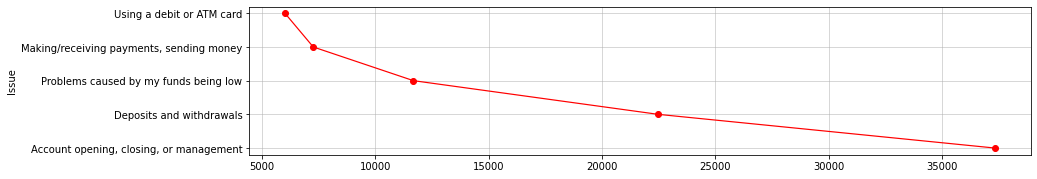

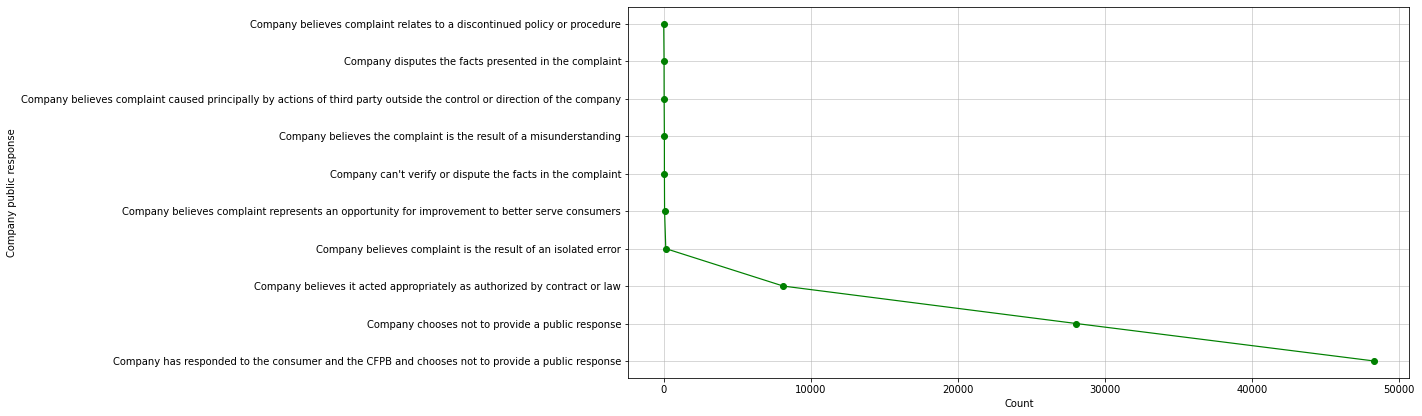

In [80]:
i = df1["Issue"].value_counts().reset_index()
r = df1["Company public response"].value_counts().reset_index()

plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(i.Issue,i["index"],marker="o",color="red",linewidth=1.2)
plt.ylabel("Issue")
plt.grid(linewidth=0.5)

plt.figure(figsize=(14,15))
plt.subplot(2,1,2)
plt.plot(r["Company public response"],r["index"],marker="o",color="green",linewidth=1.2)
plt.xlabel("Count")
plt.ylabel("Company public response")
plt.grid(linewidth=0.5)

Inferences;
- Most of the issues are related to account opening, closing or management followed by deposits, withdrawls and problems caused by funds being low.
- Minimum issues are related to using debit or atm card.
- Most of the responses from companies are Company has responded to the consumer and the CFPB and chooses not to provide a public response followed by Company chooses not to provide a public response and Company believes it acted appropriately as authorized by contract or law repectively.

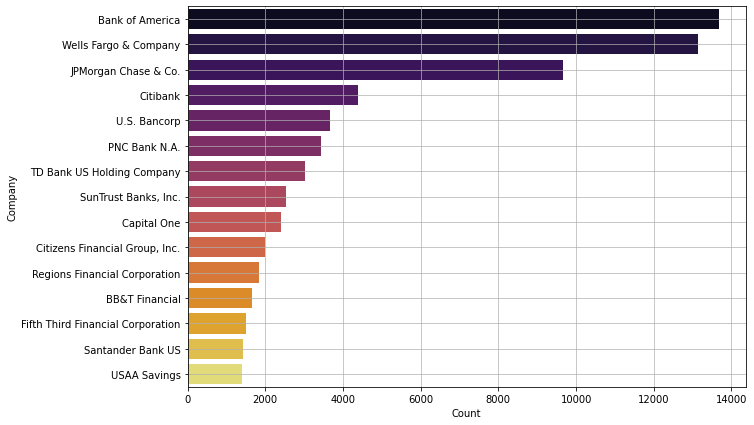

In [102]:
d = df1.Company.value_counts().reset_index().nlargest(15,"Company")
plt.figure(figsize=(10,7))
sns.barplot(x="Company",y="index",data=d,palette="inferno")
plt.xlabel("Count")
plt.ylabel("Company")
plt.grid(linewidth=0.7)

Inferences;
- Bank of America is at the top of the chart followed by Wells Fargo & Company and JPMorgan respectively in receiving majority of complaints

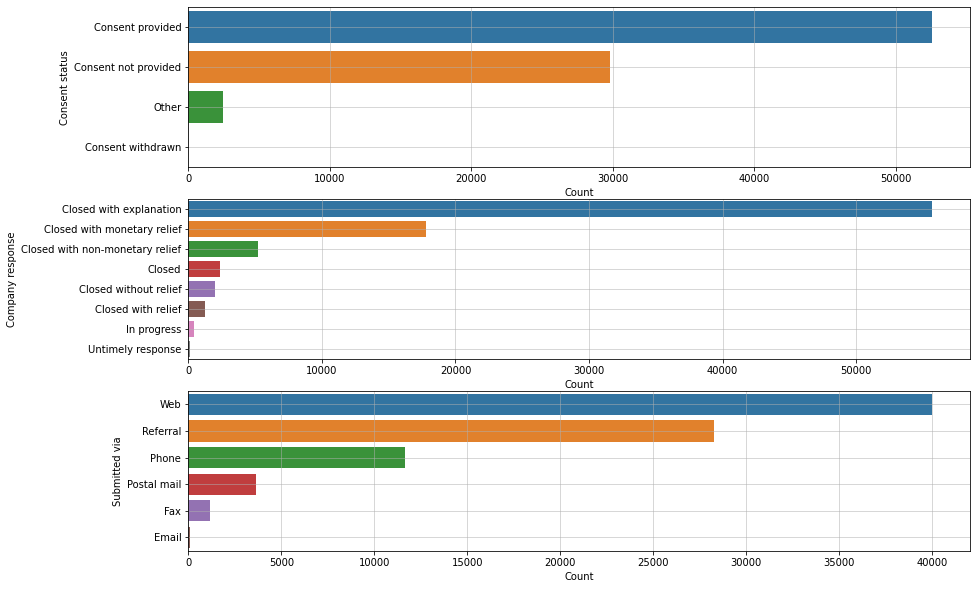

In [141]:
c = df1["Consumer consent provided?"].value_counts().reset_index()
sv = df1["Submitted via"].value_counts().reset_index()
cc = df1['Company response to consumer'].value_counts().reset_index()

plt.figure(figsize=(14,10))
plt.subplot(3,1,1)
sns.barplot(y=c["index"],x=c['Consumer consent provided?'],data=c)
plt.xlabel("Count")
plt.ylabel("Consent status")
plt.grid(linewidth=0.5)

plt.subplot(3,1,2)
sns.barplot(y=cc["index"],x=cc['Company response to consumer'],data=cc)
plt.xlabel("Count")
plt.ylabel("Company response")
plt.grid(linewidth=0.5)

plt.subplot(3,1,3)
sns.barplot(y=sv["index"],x=sv['Submitted via'],data=sv)
plt.xlabel("Count")
plt.ylabel("Submitted via")
plt.grid(linewidth=0.5)

Inferences;
- Consent is mostly provided to the consumers, there have been very less cases where the consent has been withdrawn.
- Company responses are closed with explanations most of the times followed by closed with monetary relief and non-monetary relief repectively.
- Consent is mostly provided to the consumers via Web followed by Referral and phone respectively 

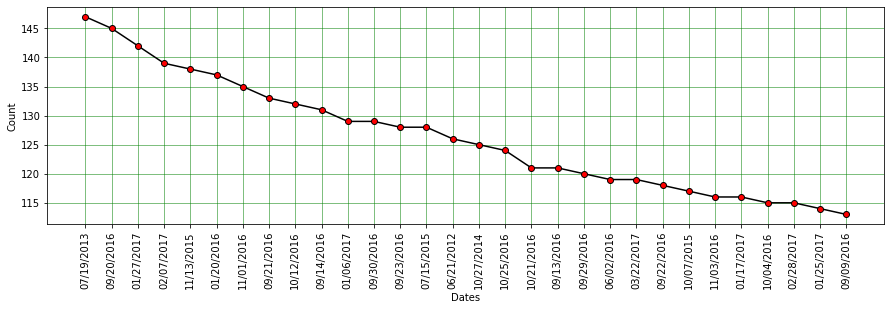

In [149]:
d = df1["Date sent to company"].value_counts().reset_index().nlargest(30,"Date sent to company")
plt.figure(figsize=(15,4))
plt.plot(d["index"],d["Date sent to company"],marker="o",linestyle="-",markerfacecolor="r",color="k")
plt.xlabel("Dates")
plt.ylabel("Count")
plt.grid(linewidth=0.5,color="green")
plt.xticks(rotation=90);

Inferences;
- Majority of consents were sent to the company on 19th of August 2013 followed by 20th of September 2016

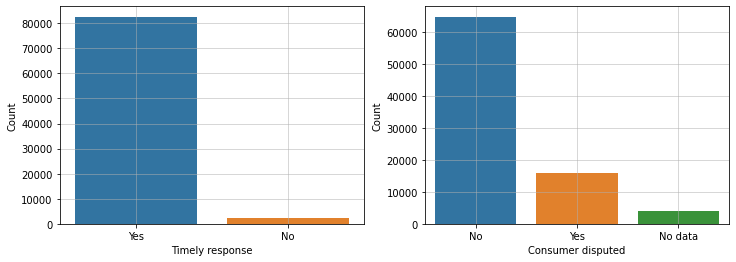

In [161]:
tr = df1["Timely response?"].value_counts().reset_index()
cd = df1["Consumer disputed?"].value_counts().reset_index()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x=tr["index"],y=tr["Timely response?"])
plt.xlabel("Timely response")
plt.ylabel("Count")
plt.grid(linewidth=0.5)

plt.subplot(1,2,2)
sns.barplot(x=cd["index"],y=cd["Consumer disputed?"])
plt.xlabel("Consumer disputed")
plt.ylabel("Count")
plt.grid(linewidth=0.5)

Inferences;
- Companies mostly provide with timely response to the consumers.
- Consumers are most of the time satisfied with the service provided.